# Beginner tutorial TF #

https://www.tensorflow.org/tutorials/quickstart/beginner

In [80]:
import tensorflow as tf
print("TF version:", tf.__version__)


TF version: 2.13.0


In [8]:
mnist = tf.keras.datasets.mnist
# 28x 28 grayscale image 0 black to 255 white (256 total)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# %255 scales the image down to 0-1 range making training more stable and faster.
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)


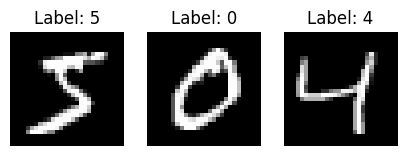

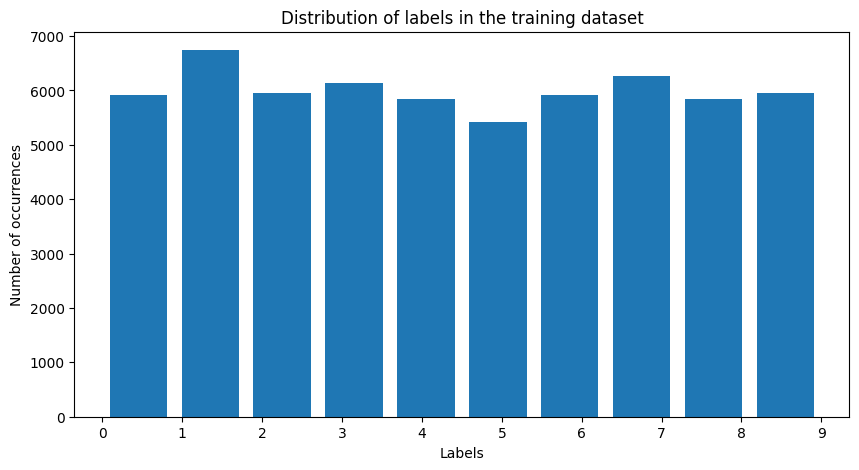

In [22]:
# Examine the data
print(x_train.shape)  # This will give you (60000, 28, 28) - meaning there are 60,000 images of size 28x28.
print(y_train.shape) 

import matplotlib.pyplot as plt

# # Display the first image
# print("First Image ")
# plt.imshow(x_train[0], cmap='gray')  # cmap='gray' is used because the images are grayscale.
# plt.title(f"Label: {y_train[0]}")
# plt.show()


# display multiple images
NUMBER_IMAGES = 3
fig, axes = plt.subplots(1+(NUMBER_IMAGES % 3), 3, figsize=(10, 10))
axes = axes.ravel()


for i in range(NUMBER_IMAGES):  # Displaying the first x images
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')  # Turn off axis numbers for clarity

plt.subplots_adjust(hspace=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=10, rwidth=0.8)
plt.title("Distribution of labels in the training dataset")
plt.xlabel("Labels")
plt.ylabel("Number of occurrences")
plt.xticks(range(10))
plt.show()

In [39]:


# 28x28 matches the image pixel size
print("SIZE:", len(x_train[0][0]))
# # ACTIVATION_FUNCTIONS = [
#     "relu", # Rectified Linear Unit - negative values are set to 0 and positive values remain. 
#     "tanh", # Hyberbolig Tangent - values between -1 to +1 ; can help the model converge fast during training; zero-centered
#     "sigmoid", # # outputs values between 0-1, good for binary classification
#     "softmax", # used mainly in output layer when classification has multiple classes; converts real vector to vector of categorical probabilities.
#     "elu", # Exponential Linear Unit - similar to RELU but the negative region is smoothed out with a non-zero gradient
#     "selu", # Scaled variant of elu;
#     "softplus", #smooth approximation to Relu
#     "softsign", # similar to tanh but not zero-centered
#     # What does zero-centered mean?
#     # range of values provides for a midpoint of 0; i.e. -1 to +1 has a 0 midpoint or zero-centered.
#     # relu is 0 to Infinity so it is not zero centered.
#     "linear", # no operation applied; raw score is output; useful for regression
#     "swish", # self-gated activation fx from google. good for ??
#     "mish", # 
    # "gelu", #Gaussian Error Linear Unit - used in models like BERT
# ]

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flattens multi-dimensional input to one dimensinoal array. 28x28 => 256 array length
    # Core component of NN. y = f(W * X  + b) = weights are multiplied and bias is added to the vector
    tf.keras.layers.Dense(128, activation="relu"), # expects a flat layer; Fully connected layer 
    # units/neurons = 128, activation fx 
    tf.keras.layers.Dropout(0.2), # regularization technique random neurons are "dropped out" at a rate of 20% or 0.2. prevents overfitting by preventing a single neuron from being to valuable.
    # can provide a seed=1 to ensure reproducibility
    # Dropout layers are used only in training, not in predicting.
    tf.keras.layers.Dense(10) # 
])
print(model)

SIZE: 28


Zeros: Initializes weights to be all zeros. This is generally not recommended for deep networks as it leads to symmetry during training, meaning all neurons in a layer behave the same way.

Ones: Initializes weights to be all ones. Like the zeros initializer, it can lead to training problems in deeper networks.

RandomNormal: Initializes weights with a normal distribution. It might not be ideal for networks with many layers, as random weights can lead to vanishing or exploding gradients.

RandomUniform: Initializes weights with a uniform distribution within a specified range.

Glorot (Xavier) Initializer: Also known as the Xavier initialization. It draws weights from a distribution with a variance of 
are the number of input and output units, respectively. It's especially recommended for the tanh and sigmoid activation functions.

He Initializer: Draws weights from a distribution with a variance of 
in. It's tailored for ReLU-based activations.

In [90]:
predictions = model(x_train[:1]).numpy()

print(predictions)
print(x_train[:1].size)
model.predict(x_train[:1])
# the values in predictions are considered logits. 
# logits are the raw, non-normalized output values producted by the last layer of a classification NN.
# logits are typically then passed to a normalization function (softmax) to product proabilities.

[[-52.063538 -25.548271 -28.3734     6.003928 -88.59333   22.060682
  -55.744408 -33.761463 -31.86137  -13.055324]]
784


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-52.063538, -25.548271, -28.3734  ,   6.003928, -88.59333 ,
         22.060682, -55.744408, -33.761463, -31.86137 , -13.055324]],
      dtype=float32)>

In [49]:
print(tf.nn.softmax(predictions))
# softmax converts prediction logits to probabilities for each class.
tf.nn.softmax(predictions).numpy() # gives probability from range 0-1; 0-100%

tf.Tensor(
[[0.09650748 0.10042106 0.0546154  0.15816046 0.1112167  0.08684356
  0.102089   0.07239025 0.14341249 0.07434364]], shape=(1, 10), dtype=float32)


array([[0.09650748, 0.10042106, 0.0546154 , 0.15816046, 0.1112167 ,
        0.08684356, 0.102089  , 0.07239025, 0.14341249, 0.07434364]],
      dtype=float32)

First Image  1.1920928e-07


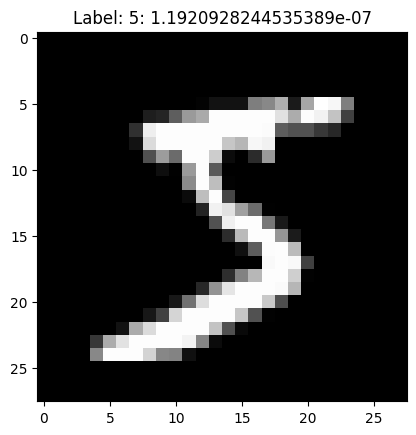

In [91]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
pred = loss_fn(y_train[:1], predictions).numpy()

# Display the first image
print("First Image ", pred)
plt.imshow(x_train[0], cmap='gray')  # cmap='gray' is used because the images are grayscale.
plt.title(f"Label: {y_train[0]}: {pred}")
plt.show()



*Optimizers*
is the algorithm/method used to adjust the params of the model (weights and bias) in order to minimize the loss function. Basically, how the model updates the params in relation to the loss fn.

Adam - Adaptive Moment Estimation - maintains moving ave of past gradients & sq of past gradients.

SGD - Stochastic Gradient Descent - most simple. update params using the gradient of hte loss fn. Doesn't consider past or preditct future gradients.

RMSProp - Root Mean Sq Propagation - uses moving ave of sq gradients to adjust learning rate of each param

AdaGrad - Adaptive Gradient Algo - scales learning rate via inverse proportional to the sq root of the sum.

Adadelta - extension of AdaGrad - limits window size to fixed size; uses a exponentially decaying average of the squared gradients.

Adamax - mod of Adam - 

Nadam - Nesterov-accelerated Adaptive Moment Est. - Nesterov combined with adam. basically making a prediction  based on the momentum/direction of movement and pushing the update slightly faster to that direction


In [70]:
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9918
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9921
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9924


In [69]:
# 0 slient, 1 progress bar, 2 one line per epoch or batch
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print("loss - sparse categorical crossentry", loss * 100)
print("metric", accuracy * 100)

313/313 - 1s - loss: 0.1020 - accuracy: 0.9795 - 507ms/epoch - 2ms/step
loss - sparse categorical crossentry 10.198324918746948
metric 97.94999957084656


In [79]:
# If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.6099589e-13, 1.2408800e-14, 4.9914294e-13, 4.5560555e-10,
        1.8639852e-19, 6.3957196e-15, 3.6589759e-24, 1.0000000e+00,
        2.5319915e-12, 3.3148616e-11]], dtype=float32)>